In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
ticker = 'AAPL'
df = yf.download(ticker, start='2015-01-01', end='2023-12-31')
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.dropna(inplace=True)
df.reset_index(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_31164\416702787.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


In [3]:
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

In [4]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2 Score:", r2)

RMSE: 7.2668365908340675
R^2 Score: 0.8462073628915898


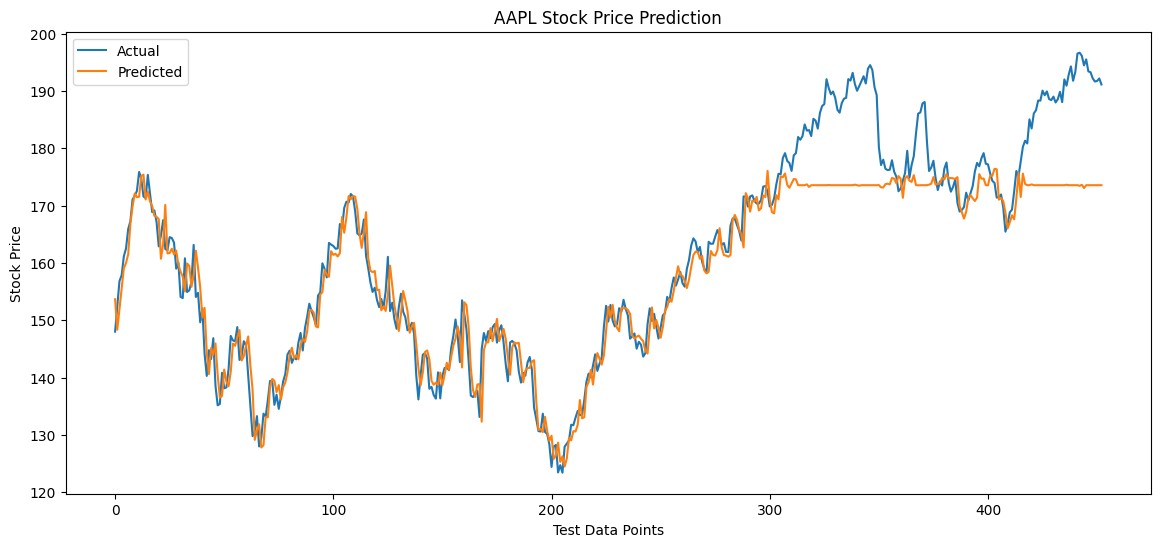

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Price')
plt.legend()
plt.show()